# Pneumonia vs Normal Chest Xray Image Classification
## Install dependencies

In [1]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt

## Load dataset

In [149]:
# loading in the three datasets used for the ML model
data_dir = '/Users/natashaoberoi/Documents/Python projects/Pneumonia_classification/chest_xray/'
train = tf.keras.utils.image_dataset_from_directory(data_dir + 'train')
test = tf.keras.utils.image_dataset_from_directory(data_dir + 'test')
val = tf.keras.utils.image_dataset_from_directory(data_dir + 'val')

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [150]:
# use numpy iterator to iterate through images
train_data_iterator = train.as_numpy_iterator() # iterator is useful for large amounts of data
test_data_iterator = test.as_numpy_iterator()
val_data_iterator = val.as_numpy_iterator()

In [151]:
train_data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x3305d0510>)

In [194]:
# get a batch of 32 from the iterator
batch = train_data_iterator.next() # gives array data for image and label

In [195]:
# Images represented as numpy arrays
batch[0].shape # batch size 32, 256x256 consistent shape

(32, 256, 256, 3)

In [196]:
batch[1] # Binary Classification of each image

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1], dtype=int32)

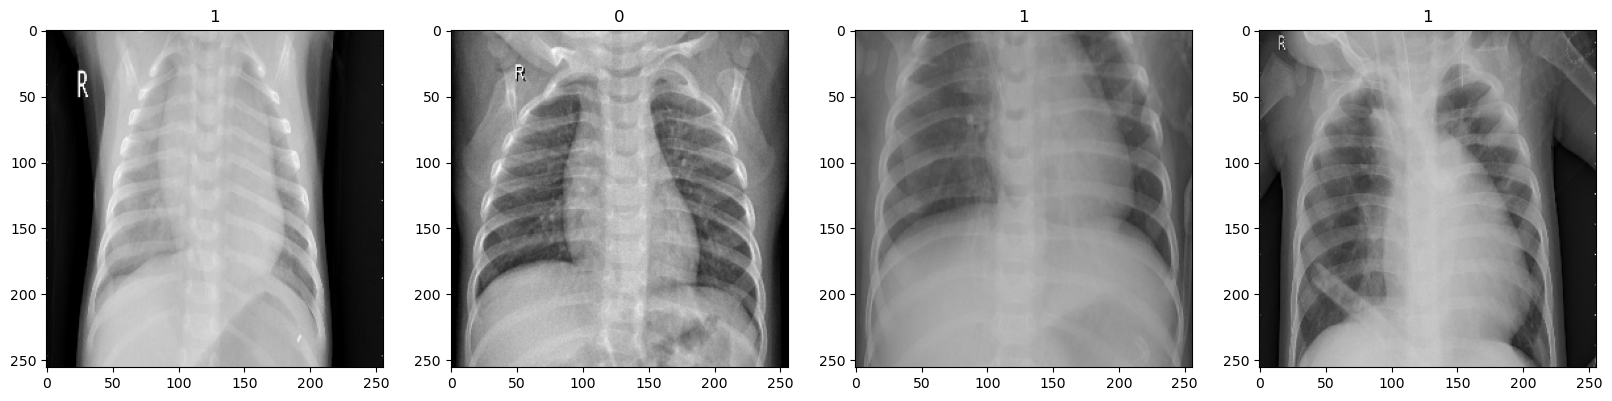

In [197]:
# Class 0 = NORMAL lungs
# Class 1 = PNEUMONIA
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for img_id, img in enumerate(batch[0][:4]):
    ax[img_id].imshow(img.astype(int))
    ax[img_id].title.set_text(batch[1][img_id])

## Scale data

In [9]:
# currently, the image data is represented as rgb values from 0.0 to 255.0
# we will scale this data down to optimize model performance
# we use the map function to do this inside the data pipeline- this will transform the data as it is being loaded in
train = train.map(lambda x,y: (x/255, y)) # x: image data, y: labels
test = test.map(lambda x,y: (x/255, y))
val = val.map(lambda x,y: (x/255, y))

## Build Deep Learning Model

In [42]:
# Sequential is appropriate when the data has exactly one input and one output
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [80]:
model = Sequential()

In [81]:
# Adding hidden layers and output layer to the model
model.add(Conv2D(8, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(8, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [82]:
# Compiling using the adam optimizer function to minimize loss
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [86]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)              │ (None, 254, 254, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 127, 127, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 125, 125, 16)   │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 60, 60, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 30, 30, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │     1,843,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,538,797 (21.13 MB)

 Trainable params: 1,846,265 (7.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,692,532 (14.09 MB)

## Train

In [50]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [85]:
# Training the model
# Note: Adding a GPU will speed up the training
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 62s 369ms/step - accuracy: 0.8519 - loss: 0.3462 - val_accuracy: 0.6250 - val_loss: 0.6736
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 58s 353ms/step - accuracy: 0.9574 - loss: 0.1173 - val_accuracy: 0.8750 - val_loss: 0.2826
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 60s 365ms/step - accuracy: 0.9684 - loss: 0.0825 - val_accuracy: 0.8750 - val_loss: 0.1831
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 67s 410ms/step - accuracy: 0.9780 - loss: 0.0634 - val_accuracy: 0.8125 - val_loss: 0.2708
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 58s 353ms/step - accuracy: 0.9785 - loss: 0.0564 - val_accuracy: 0.8750 - val_loss: 0.3344
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 62s 381ms/step - accuracy: 0.9840 - loss: 0.0390 - val_accuracy: 0.9375 - val_loss: 0.1683
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 59s 359ms/step - accuracy: 0.9828 - loss: 0.0425 - val_accuracy: 0.9375 - val_loss: 0.1375
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 58s 356ms/step - accuracy: 0.9913 - loss: 0

In [87]:
hist.history

{'accuracy': [0.9215874075889587,
  0.9631901979446411,
  0.9758435487747192,
  0.977569043636322,
  0.9819785356521606,
  0.9856211543083191,
  0.9840874075889587,
  0.9861963391304016,
  0.9884969592094421,
  0.9919478297233582,
  0.995782196521759,
  0.9990414381027222,
  0.9938650131225586,
  0.998274564743042,
  0.9998083114624023,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [0.19790923595428467,
  0.0986073762178421,
  0.07049595564603806,
  0.0578276626765728,
  0.05277073755860329,
  0.03794148191809654,
  0.04147665202617645,
  0.03583219274878502,
  0.031925421208143234,
  0.022128477692604065,
  0.012790357694029808,
  0.004816782660782337,
  0.01610172726213932,
  0.006361918989568949,
  0.001482450868934393,
  0.00034722566488198936,
  0.000307452748529613,
  0.00012769158638548106,
  9.194848826155066e-05,
  7.2862756496761e-05],
 'val_accuracy': [0.625,
  0.875,
  0.875,
  0.8125,
  0.875,
  0.9375,
  0.9375,
  1.0,
  0.875,
  0.9375,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,


## Plot Performance

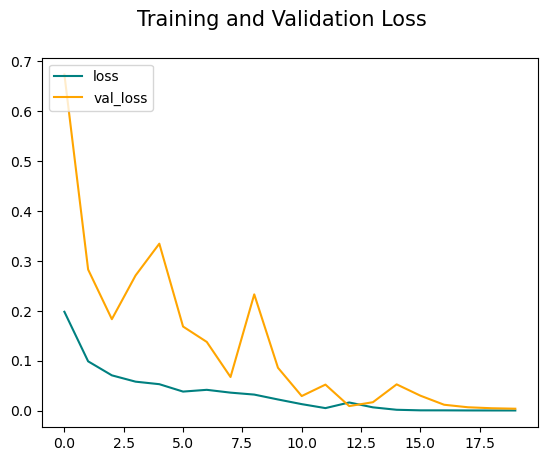

In [92]:
# Plotting loss in the train and val datasets- we should see a gradual decrease in loss
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Training and Validation Loss', fontsize=15)
plt.legend(loc="upper left")
plt.show()

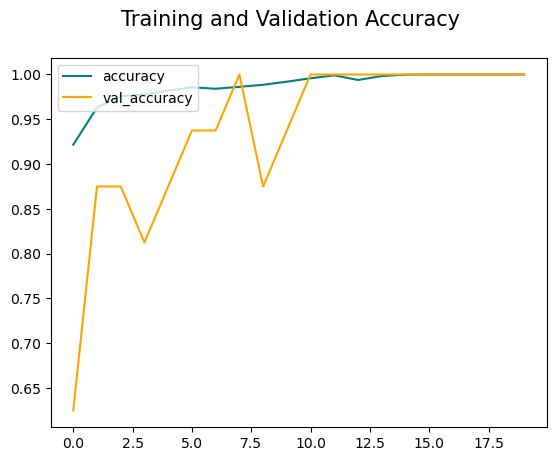

In [93]:
# Plotting accuracy in the train and val datasets- we should see a gradual increase in accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Training and Validation Accuracy', fontsize=15)
plt.legend(loc="upper left")
plt.show()

## Evaluate Performance

In [190]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [191]:
# These three metrics will give us a measure of how well our binary classification model is performing
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [192]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


2024-05-28 20:40:13.384085: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [193]:
# Accuracy- how comfortable the model is with correctly detecting the positive and negative classes
# Precision- model's accuracy in correctly identifying a positive sample as positive
# Recall- how sensitive the model is towards identifying the positive class

print(f'Precision:{pre.result()}, Recall: {re.result()}, Accuracy: {acc.result()}')

Precision:0.7446808218955994, Recall: 0.9871794581413269, Accuracy: 0.7804487347602844


## Testing

In [185]:
test_batch = test_data_iterator.next()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


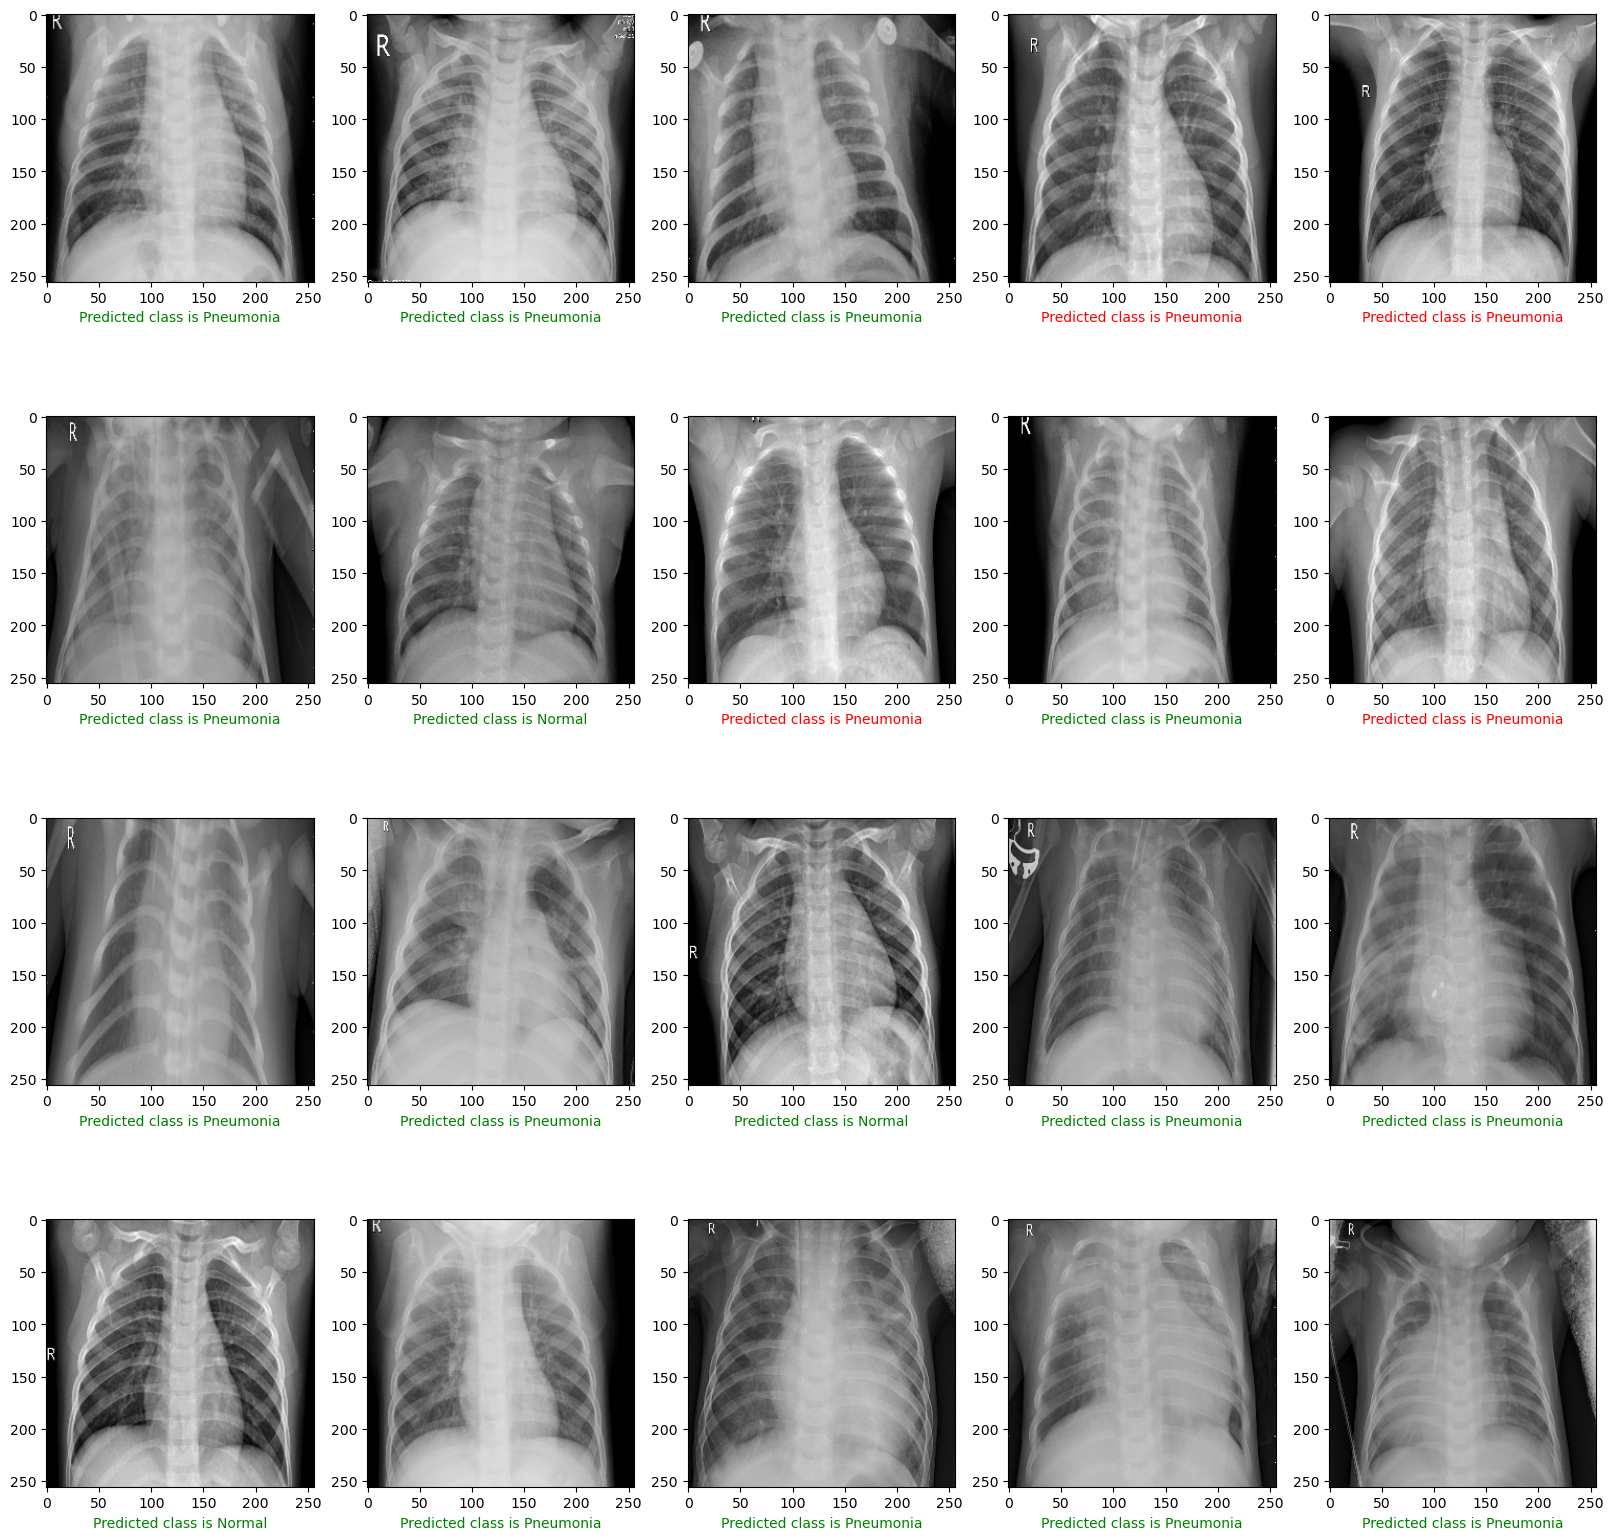

In [186]:
# Testing our model!
# We will now visualize how accurately our model predicts the class of our test data
# Correct predictions are labeled in green, and incorrect predictions are labeled in red
plt.figure(figsize=(20,20))
for img_id, img in enumerate(test_batch[0][:20]):
    plt.subplot(4,5,img_id+1)
    plt.imshow(img.astype(int))

    resize = tf.image.resize(test_batch[0][img_id], (256,256))
    yhat = model.predict(np.expand_dims(resize/255, 0))

    if yhat > 0.5: 
        if test_batch[1][img_id] == 1: col = 'g' 
        else: col = 'r'
        plt.xlabel('Predicted class is Pneumonia', color=col)
    else:
        if test_batch[1][img_id] == 0: col = 'g' 
        else: col = 'r'
        plt.xlabel('Predicted class is Normal', color=col)
plt.show()

## Saving the model

In [187]:
from tensorflow.keras.models import load_model

In [189]:
# Finally we save our model so it can be used in the future using load_model
model.save(os.path.join('models','pneumoniaxraymodel.h5'))